In [ ]:
# drive dosya erişim
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Kütüphane import edildi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
#veri içeri aktarıldı
data = pd.read_csv("/content/drive/MyDrive/Regresyon_Kümeleme_Sınıflandırma_Data/decision_tree.csv")
#başlıklar bastırıldı
print(data.head())


     UserID Gender  Age  EstimatedSalary  Purchased
0  15624510  Erkek   19            19000          0
1  15810944  Erkek   35            20000          0
2  15668575  Kadın   26            43000          0
3  15603246  Kadın   27            57000          0
4  15804002  Erkek   19            76000          0


In [ ]:
#ilk 4 veri setini ve verinin parametreleri alındı
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [ ]:
#eğitim ve test veri setleri oluşturuldu
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state= 0)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#kara ağacı fonksiyonumuzu çağırdım
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)


In [ ]:
#doğruluk payımızın ne kadar olduğunu kontrol ettim
y_pred = classifier.predict(X_test)
print('Doğruluk payı', metrics.accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Doğruluk payı 0.9
[[62  6]
 [ 4 28]]


<ipython-input-10-ed430b67a65a>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("gray","red"))(i),label = j)


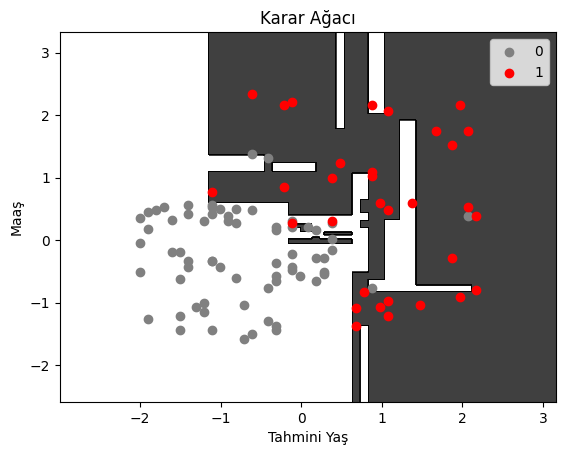

In [ ]:
#Veri setlerimiziden oluşturulan modeli görselleştirdim
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(("white","black")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("gray","red"))(i),label = j)
plt.title("Karar Ağacı")
plt.xlabel("Tahmini Yaş")
plt.ylabel("Maaş")
plt.legend()
plt.show()